# 2-1 라이브러리 임포트

In [1]:
# 형태소 분석기 예시

from konlpy.tag import Mecab # 메캅!

mecab = Mecab()
print(mecab.morphs('자연어처리가너무재밌어서밥먹는것도가끔까먹어요'))

['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']


In [2]:
# 사용할 라이브러리 임포트
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

# 2-2 데이터 다운로드 및 전처리

In [26]:
# 데이터 불러오기
import os
path_to_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko'

with open(path_to_file, "r") as f: 
    raw = f.read().splitlines() # 줄 단위로 읽어봅시다.

print("Data Size:", len(raw))# 문장은 총 몇 개?

print("Example:")
for sen in raw[0:100][::20]: print(">>", sen) # 0~100 사이에 20씩 건너뛰며 5개 출력 맞나?

Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60
sentence_length :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


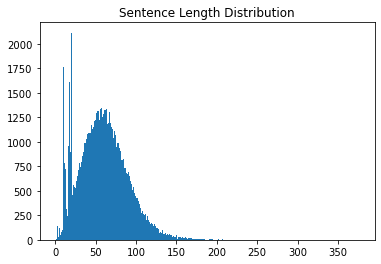

In [6]:
# 문장의 최단 길이, 최장 길이, 평균 길이를 구한 후 문장 길이 분포를 막대그래프로 표현

min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    
    # 문장 최소 길이 찾기
    if min_len > length: 
        min_len = length
    
    # 문장 최대 길이 찾기
    if max_len < length: 
        max_len = length
        
    # 전체 문장을 합치면 길이가 얼마나 될까요?
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

# 전체 길이만큼 0벡터 ==> 길이에 따른 문장의 수를 저장하기 위해 먼저 0으로 이루어진 리스트를 만든다!!
sentence_length = np.zeros((max_len), dtype=np.int)
print("sentence_length : ",sentence_length)

print("="*60)

# raw는 위에서 다운로드한 데이터셋!! 전체 길이와 상관없음
for sen in raw:
    sentence_length[len(sen)-1] += 1 # 0으로 이루어진 벡터에 문장 count를 더한 뒤 넣는다.

plt.bar(range(max_len), sentence_length, width=1.0) # 너비는 1.0씩 늘어나도록 설정
plt.title("Sentence Length Distribution")
plt.show()

In [7]:
# 전체 문장의 개수가 100개를 넘어가는 문장 중 길이가 length에 해당하는 문장을 출력
def check_sentence_with_length(raw, length):
    count = 0
    
    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

check_sentence_with_length(raw, 1) # , 임을 알 수 있음

’


In [8]:
# 전체 문장의 수가 1500개를 넘어가는 문장의 인덱스를 출력

for idx, _sum in enumerate(sentence_length):
    # 문장의 수가 1500을 초과하는 문장 길이를 추출합니다.
    if _sum > 1500:
        print("Outlier Index:", idx+1)

Outlier Index: 11
Outlier Index: 19
Outlier Index: 21


In [9]:
# 이상치로 잡힌 것은 11 / 문장길이가 11개에 해당하는 모든 문장을 출력해봅니다.
check_sentence_with_length(raw, 11)

# 중복되는 문장이 많음 ==> set을 이용해 중복 제거 // (번역 코퍼스면 안됨!! 순서가 뒤섞임!!)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

In [10]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

# Data Size : 94123 --> 77591 // (중복제거)

Data Size: 77591


문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


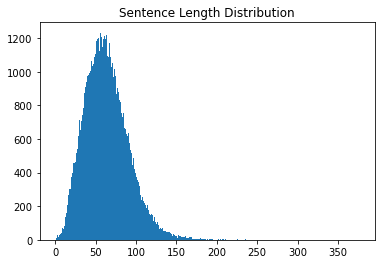

In [11]:

for sen in cleaned_corpus:
    # 길이 체크
    length = len(sen)
    
    # 최소 길이
    if min_len > length: 
        min_len = length
        
    # 최대 길이
    if max_len < length: 
        max_len = length
    
    # 전체 문장을 합쳤을 때의 길이
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

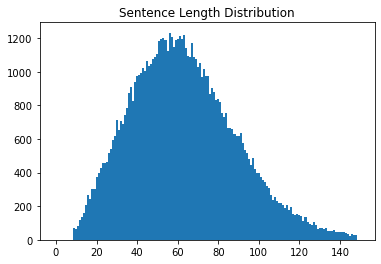

In [12]:
# 미니 배치를 만들 것을 생각하면 모든 데이터를 다 사용하는 것은 연산 측면에서 비효율적
# 보통 패딩은 가장 긴 데이터를 기준으로 Padding 처리
# 여기서는 길이 150 이상의 데이터를 제거하고 사용 / 앞서 확인한 것처럼 너무 짧은 데이터는 오히려 노이즈로 작용 ==> 10 이하도 삭제


max_len = 150
min_len = 10

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

# 최종 데이터 분포 확인
plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

# 2-3 공백 기반 토큰화

In [13]:
# 공백 기반 토큰화를 진행
# 정제된 데이터를 공백 기반으로 토큰화하여 list에 저장
# tokenize() 함수를 사용해 단어 사전과 Tensor 데이터
# 단어 사전의 크기를 확인

# 토크나이저 함수 선언!
def tokenize(corpus):  # corpus: Tokenized Sentence's List
    
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='') # 토크나이저 선언
    tokenizer.fit_on_texts(corpus) # 빈도수를 기준으로 단어 집합을 생성

    tensor = tokenizer.texts_to_sequences(corpus) # 단어를 시퀀스 형태로 변환

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post') # 패딩

    return tensor, tokenizer

In [14]:
# 정제된 데이터를 공백 기반으로 토큰화하여 저장하는 코드를 직접 작성해 보세요.
split_corpus = []

# filtered_corpus는 위에서 진행한 전처리를 모두 수행한 corpus
for kor in filtered_corpus:
    # 코드를 작성하세요
    split_corpus.append(kor.split()) # 공백을 기준으로 split하여 split_corpus에 저장

In [17]:
# 공백 기반 토큰화를 진행한 후, 단어 사전의 길이를 확인
split_tensor, split_tokenizer = tokenize(split_corpus)
# print(split_tensor) # 단어를 시퀀스 형태로 변환한 것에 패딩
# print(split_tokenizer) # 단어 빈도수를 기준으로 단어 사전을 생성

print("Split Vocab Size:", len(split_tokenizer.index_word))

Split Vocab Size: 237435


In [19]:
# 생성된 단어 사전을 확인 

# 10개 출력
for idx, word in enumerate(split_tokenizer.word_index):
    if idx > 10: 
        break
    print(idx, ":", word)
    

0 : 이
1 : 밝혔다.
2 : 있다.
3 : 말했다.
4 : 수
5 : 있는
6 : 그는
7 : 대한
8 : 위해
9 : 전했다.
10 : 지난


# 2-4 형태소 기반 토큰화

### 공백 기반 토큰화의 문제점

1번 단어인 밝혔다. 는 밝히다 , 밝다 등과 유사한 의미를 지니고 있음에도 전혀 다른 단어로 분류       
때문에 공백 기반 토큰화는 불필요하게 큰 단어 사전을 가지게 됨       
이는 연산량 증가로 이어짐      

밝 + 혔다 라고 토큰화했다면 밝 + 히다, 밝 + 다 같은 구절이 등장했을 때,    
공통된 어절인 밝 은 하나로 묶여 학습 중에 의미를 파악하기가 수월     
단어 사전도 효율적으로 축소     
이를 위해 한국어 형태소 분석기 사용       


In [20]:
# 위에서 사용한 코드를 활용해 MeCab 단어 사전을 만들어보세요. 

def mecab_split(sentence):
    # 코드를 작성하세요
    return mecab.morphs(sentence) # mecab.morphs()를 사용해서 형태소분석을 합니다.

mecab_corpus = []

# 위에서 공백 기반 토큰화를 했던 코드와 유사 // but 형태소 기반 토큰화!!!
for kor in filtered_corpus:
    # 코드를 작성하세요
    mecab_corpus.append(mecab_split(kor))

In [21]:
# 단어 사전의 길이를 확인
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)

print("MeCab Vocab Size:", len(mecab_tokenizer.index_word))

# Split Vocab Size: 237435 // MeCab Vocab Size: 52279  ===> 약 5배 차이

MeCab Vocab Size: 52279


# 2-5 SentencePiece

SentencePiece같은 Subword 기반 토큰화보다 형태소 분석기가 좋은 성능을 내는 사례가 존재       
ETRI에서 발표한 한국어 BERT 모델인 KorBERT가 대표적인 사례 중 하나        

위에서는 문장을 Tensor로 Encoding하는 과정을 주로 다룸           
때문에 모델이 생성한 Tensor를 문장으로 Decoding하는 과정도 필요    

In [22]:
# 1) tokenizer.sequences_to_texts() 함수를 사용하여 Decoding
texts = mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])
print(texts[0])

푸틴 총리 는 gecf 회원국 들 에게 러시아 상트페테르부르크 에 본부 를 건립 하 고 이 기구 의 외교 적 지위 를 인정 할 것 을 촉구 했 다 .


In [23]:
# 2) tokenizer.index_word 를 사용하여 Decoding
sentence = ""

for w in mecab_tensor[100]:
    # 첫번째만 뽑아내기
    if w == 0: 
        continue
    sentence += mecab_tokenizer.index_word[w] + " "

print(sentence)

푸틴 총리 는 gecf 회원국 들 에게 러시아 상트페테르부르크 에 본부 를 건립 하 고 이 기구 의 외교 적 지위 를 인정 할 것 을 촉구 했 다 . 
